In [6]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from common_functions import encode_message_range, encode_message, decode_message

# TODO: Enable Code formatting
# %load_ext jupyter_black

In [7]:
n = 10

In [8]:
# TODO: Nonce generation at the beggining is skipped

In [9]:
# Party A and Party B generate random basis a and basis b
a_bases = randint(2, size=n)
print("a bases:", a_bases)
b_bases = randint(2, size=n)
print("\nb bases:", b_bases)

# A generates n random challenger-bits c
c_bits = randint(2, size=n)
print("\nc bits:", c_bits)

a bases: [0 1 0 0 0 1 1 0 0 1]

b bases: [0 0 1 1 1 1 1 1 0 1]

c bits: [0 0 0 1 1 1 1 1 0 0]


In [10]:
# Encode c[0] and c[1] in a
message = encode_message_range(c_bits, a_bases, 0, 1, n)

# Create a quantum circuit
qc = QuantumCircuit(n)

# Append the encoded message to the quantum circuit
for i in range(2):
    qc.append(message[i].to_gate(), [i])

# Entangle the bits in pairs
for i in range(0, n, 2):
    qc.h(i)
    qc.h(i+1)
    qc.cx(i, i+1)

# Draw the circuit
qc.draw(output="mpl")

IndexError: list index out of range

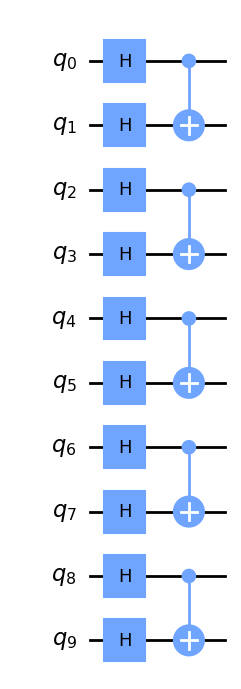

In [ ]:
# Create a quantum circuit
qc = QuantumCircuit(n)

# Entangle the bits in pairs
for i in range(0, n, 2):
    qc.h(i)
    qc.h(i+1)
    qc.cx(i, i+1)

# Draw the circuit
qc.draw(output="mpl")

In [ ]:
# Prover decodes the qubits in the bases a and store them as c'
c_prime_bits = decode_message(message, a_bases, n)
print("\nc' bits:", c_prime_bits)

IndexError: list index out of range

In [ ]:
# Prover re-encode the qubits in the bases b and sends them to the Verifier
message_back = encode_message(c_prime_bits, b_bases, n)

# Verifier decodes the message in the bases b and store them as c''
c_prime_two_bits = decode_message(message_back, b_bases, n)

# Verifier compares c' and c''
print(np.array_equal(c_bits, c_prime_two_bits))

True


In [ ]:
# TODO: Last step is a MAC check
# TODO: CURRENTLY I SEND ALL OF THE BITS. THEY NEED TO BE SEND ONE BY ONE. SO I NEED LOOP THROUGH IT